# 로지스틱 회귀
- 확률을 변환해준다
- 럭키박스 내부에 어떤 물건 들어있을 확률(골드애플 같은거)  : 이름은 회귀인데 분류모델이다
![시그모이드그래프](https://blog.kakaocdn.net/dn/sib2q/btsDJkfaBMy/pkKQYrLYXHVDODrXvQNqK0/img.png)

- 50%를 기준으로 양수이냐 음수이냐 나눠줌
- 무슨 숫자를 집어넣든 0~1사이의 값으로 확률로 변환해줌

In [128]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv('data/Fish.csv')

In [129]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [130]:
fish_input = df[['Weight', 'Length2', 'Length3', 'Height', 'Width']]
fish_target = df[['Species']]

In [131]:
x_input, y_input, x_target, y_target = train_test_split(fish_input, fish_target)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_input)

train_scaled = ss.transform(x_input)
test_scaled = ss.transform(y_input)

In [133]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, x_target)

print(kn.score(train_scaled, x_target))
print(kn.score(test_scaled, y_target))

0.8823529411764706
0.65


C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [134]:
kn.predict_proba(test_scaled)

array([[0. , 0. , 0.4, 0. , 0.6, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.4, 0.6, 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.4, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0.2, 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.2, 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. ,

## 로지스틱스 회귀로 이진 분류 수행하기
- 도미 Bream 와 빙어 Smelt 두가지 분류

In [135]:
bream_smelt_indexes = (x_target == 'Bream') | (x_target == 'Smelt') # 브림이거나 스멜트이면 트루를 반환

train_bs = train_scaled[bream_smelt_indexes['Species']]
target_bs = x_target[bream_smelt_indexes['Species']]

In [136]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bs, target_bs)

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [137]:
lr.predict(train_bs[:5]) # 결과만 보여줌

array(['Bream', 'Smelt', 'Bream', 'Smelt', 'Bream'], dtype=object)

In [143]:
lr.predict_proba(train_bs[:5])# 확률까지 보고자 할 때

array([[9.10166317e-01, 1.76254844e-02, 3.44027784e-02, 7.19420578e-03,
        1.34127242e-02, 5.91313338e-06, 1.71925768e-02],
       [9.42035624e-04, 4.68637741e-02, 3.54064077e-01, 4.36924888e-03,
        1.81058232e-01, 4.05133435e-01, 7.56919678e-03],
       [9.85871004e-01, 2.17247579e-03, 5.36689564e-03, 1.42552413e-03,
        1.01696837e-03, 4.35847942e-08, 4.14708803e-03],
       [3.50178682e-04, 3.27864038e-02, 1.08362516e-01, 1.84465166e-03,
        7.27488373e-02, 7.81530017e-01, 2.37739579e-03],
       [9.22482918e-01, 1.54036151e-02, 1.99994760e-02, 7.13718007e-03,
        1.75302796e-02, 3.59444702e-06, 1.74429364e-02]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

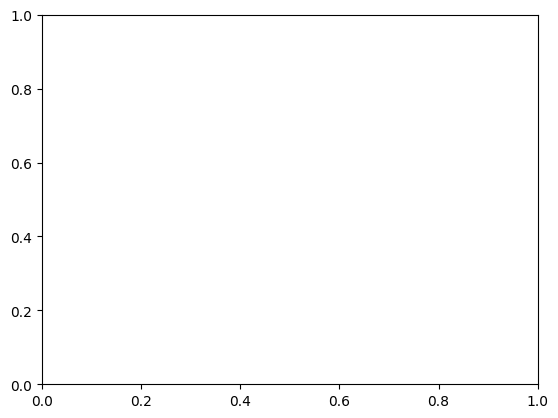

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 로드 (예시: Fish.csv 또는 AnotherFish.csv)
fish_data = pd.read_csv('data/Fish.csv')
# 데이터셋에 맞는 특성과 타겟 변수 분리 (예시: fish_data에서 'Target' 컬럼이 목표 변수라 가정)
X = fish_data.drop(columns='Species')  # 특성
y = fish_data['Species']  # 타겟

# PCA로 2D로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 데이터셋을 훈련용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y):
    h = .02  # 그리드 크기
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

    # 훈련 데이터 포인트 그리기
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(model, X_train, y_train)


---

## 다중 분류 수행하기
- `max_iter` : 기본값은 100. 더 많이 수행해서 더 fit한 곡선을 찾음(성능이 올라간다)
- `C` : 

In [139]:
lr = LogisticRegression()
lr.fit(train_scaled, x_target)

print(lr.score(train_scaled, x_target))
print(lr.score(test_scaled, y_target))

0.7815126050420168
0.725


C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
lr.predict_proba(test_scaled[:5])

array([[1.63787630e-02, 7.28835133e-02, 5.21942683e-01, 1.51284065e-02,
        3.18630065e-01, 2.29383202e-02, 3.20982493e-02],
       [7.28557750e-01, 7.98383927e-02, 5.06723472e-02, 1.51883434e-02,
        9.08245601e-02, 1.95949243e-04, 3.47226571e-02],
       [1.16032925e-02, 4.84674683e-02, 5.76077929e-01, 2.29574518e-02,
        2.92369466e-01, 1.80138622e-02, 3.05105301e-02],
       [1.30483663e-02, 1.64093282e-02, 2.14109965e-01, 5.25446397e-01,
        1.99027898e-01, 6.32295540e-03, 2.56350908e-02],
       [9.89574433e-01, 1.79453444e-03, 4.46483058e-03, 4.11759144e-04,
        6.25118650e-04, 1.82277116e-08, 3.12930577e-03]])

In [141]:
lr.predict(test_scaled[:5]) # 결과값의 갯수차이는 뭐때문인가

array(['Perch', 'Bream', 'Perch', 'Pike', 'Bream'], dtype=object)

In [142]:
lr.coef_.shape # 7마리 분류해야되서 방정식을 7개 만든 것

(7, 5)